In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import numpy as np

In [60]:
# 변수 정의

num = 10
epochs = 100
learning_rate = 0.01

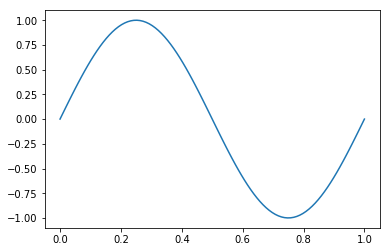

In [130]:
# 정상적인 sin(2πx)의 그래프

sinx = np.linspace(0.0, 1.0, 100)
siny = np.sin(2 * np.pi * sinx)

plt.plot(sinx, siny)
plt.show()

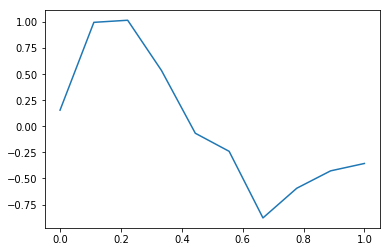

In [131]:
# sin + noise 그래프

train_x = np.linspace(0.0, 1.0, num)
n = np.random.uniform(-0.5, 0.5, num)
train_y = np.sin(2 * np.pi * train_x)
train_y += n

plt.plot(train_x, train_y)
plt.show()

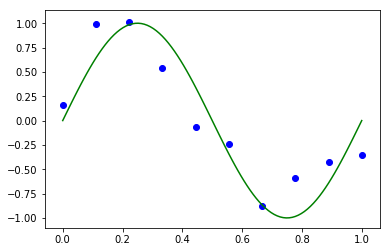

In [132]:
plt.scatter(train_x, train_y, color="blue")
#fig, ax = plt.subplots()
plt.plot(sinx, siny, color='green')
plt.show()

In [133]:
# tensorflow 변수

X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

W1 = tf.Variable(tf.random_normal([1]), name='weight1')
W2 = tf.Variable(tf.random_normal([1]), name='weight2')
W3 = tf.Variable(tf.random_normal([1]), name='weight3')
b = tf.Variable(tf.random_normal([1]), name='bias')

Y_pred = tf.add(tf.multiply(X, W1), b)
Y_pred = tf.add(tf.multiply(tf.pow(X, 2), W2), Y_pred)
Y_pred = tf.add(tf.multiply(tf.pow(X, 3), W3), Y_pred)

#Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
#for i in range(1, num_coeffs):
#    W = tf.Variable(tf.random_normal([1]), name='weight_%d' % i)
#    Y_pred = tf.add(tf.multiply(tf.pow(X, i), W), Y_pred)

In [134]:
# cost 함수

cost = tf.reduce_sum(tf.pow(Y_pred - Y, 2))

In [135]:
# optimizer

optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

In [136]:
# 변수 초기화

init = tf.global_variables_initializer()

epoch : 0, cost : 20.9458
epoch : 10, cost : 2.89289
epoch : 20, cost : 2.09185
epoch : 30, cost : 1.76571
epoch : 40, cost : 1.62154
epoch : 50, cost : 1.55674
epoch : 60, cost : 1.5269
epoch : 70, cost : 1.51257
epoch : 80, cost : 1.50519
epoch : 90, cost : 1.50098
[ 0.81078809  0.60713249  0.40433395  0.20754193  0.02190606 -0.14742416
 -0.29529911 -0.4165692  -0.50608498 -0.55869687]


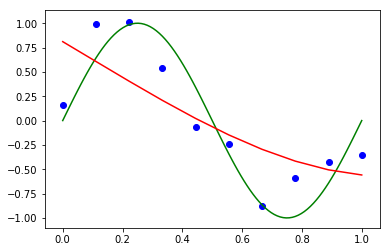

In [138]:
# 세션 시작

with tf.Session() as sess:
    
    # 초기화 실행
    sess.run(init)
    
    for epoch in range(epochs):
        for (x, y) in zip(train_x, train_y):
            sess.run(optimizer, feed_dict={X:x, Y:y})
        
        if epoch % 10 == 0:
            c = sess.run(cost, feed_dict={X:train_x, Y:train_y})
            print("epoch : " + str(epoch) + ", cost : " + str(c))
                    
            
    w1 = sess.run(W1)
    w2 = sess.run(W2)
    w3 = sess.run(W3)
    bias = sess.run(b)
               
    print(Y_pred.eval(feed_dict={X:train_x}, session=sess))
    plt.scatter(train_x, train_y, color="blue")
    #fig, ax = plt.subplots()
    plt.plot(sinx, siny, color='green')
    plt.plot(train_x, Y_pred.eval(feed_dict={X:train_x}, session=sess), 'r')
    plt.show()